# Linear Regression Analysis

This script contains the following:

1. Import Libraries and Data
2. Data Cleaning
3. Exploratory Analysis - Scatterplot
4. Hypothesis
5. Reshape Variables into NumPy Arrays
6. Split Data into Training and Test Sets
7. Running the Linear Regression
8. Visualising the model
9. Interpretations
10. Model Performance Checks
11. Comparing Predicted and Actual Y Values
12. Reflection on model's performance and bias

**Note:** The goal for this regression analysis will be to see if a model can be designed to predict the duration of a survived patient's treatment based on how long it takes to start treatment from the diagnosis date (This does not relate to any of the project questions generated in exercise 6.1, but those questions are not suited for a regression analysis)

## 1. Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split # for splitting the data into training and testing data sets
from sklearn.linear_model import LinearRegression # for importing the Linear Regression Model
from sklearn.metrics import mean_squared_error, r2_score # for calculating the model's statistics

In [2]:
# Set path
path = r'C:\Users\kyles\CareerFoundary\Data Immersion\Achievement 6 - Advanced Analytics & Dashboard Design'

In [3]:
# Import data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Lung_cancer_merged_v1.pkl'))

# Check
pd.set_option('display.max_columns', None)
df.head()

,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,days_to_start_treatment,days_under_treatment,Country GDP (per capita),Country life expectancy,Country population,treatment_duration
0,64,Female,Germany,2016-04-07,Stage III,2016-04-21,False,Never Smoked,31.09375,257,True,True,False,False,Combined,2017-11-15,False,14,573,42136.12079,80.990244,82348669,Long
1,54,Female,Germany,2016-12-15,Stage III,2016-12-22,False,Former Smoker,21.90625,191,True,True,False,False,Combined,2018-06-14,False,7,539,42136.12079,80.990244,82348669,Medium
2,61,Male,Germany,2016-07-14,Stage III,2016-07-27,True,Former Smoker,18.00000,211,False,False,False,False,Combined,2017-09-03,False,13,403,42136.12079,80.990244,82348669,Medium
3,47,Female,Germany,2016-03-19,Stage IV,2016-03-26,False,Current Smoker,39.50000,247,True,True,False,False,Chemotherapy,2017-04-06,False,7,376,42136.12079,80.990244,82348669,Medium
4,52,Male,Germany,2016-08-20,Stage II,2016-08-31,False,Former Smoker,39.31250,284,True,False,False,False,Combined,2018-01-23,False,11,510,42136.12079,80.990244,82348669,Medium


In [4]:
df.shape

(2842404, 23)

## 2. Data Cleaning

### Missing Values

In [5]:
df.isnull().sum()

age                            0
gender                         0
country                        0
diagnosis_date                 0
cancer_stage                   0
beginning_of_treatment_date    0
family_history                 0
smoking_status                 0
bmi                            0
cholesterol_level              0
hypertension                   0
asthma                         0
cirrhosis                      0
other_cancer                   0
treatment_type                 0
end_treatment_date             0
survived                       0
days_to_start_treatment        0
days_under_treatment           0
Country GDP (per capita)       0
Country life expectancy        0
Country population             0
treatment_duration             0
dtype: int64

No Missing Values

### Duplicates

In [6]:
df.duplicated().value_counts(dropna=False)

False    2842404
Name: count, dtype: int64

No Duplicates

### Subsetting

- Since I know I want my correlation to focus on predicting treatment duration based on days to start streatment for survived patients, I am going to subset the data to only include survived patients. I may also later create further subsets to focus on specific cancer stages and/or treatment types (or leave this until the final task, the Tableau Storyboard)

In [7]:
df_survived = df[df['survived'] == True]
df_survived['survived'].value_counts(dropna=False)

survived
True    624605
Name: count, dtype: int64

### Outliers

I will use histograms to check for outliers in the "days_to_start_treatment" variables and "days_under_treatment" variable

<Axes: xlabel='days_under_treatment', ylabel='Count'>

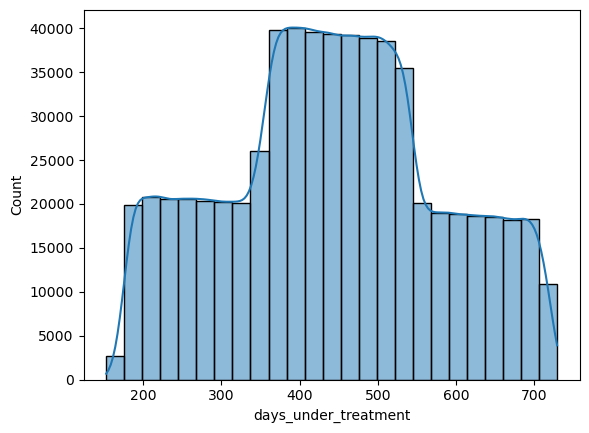

In [8]:
sns.histplot(df_survived['days_under_treatment'], bins = 25, kde=True)

<Axes: xlabel='days_to_start_treatment', ylabel='Count'>

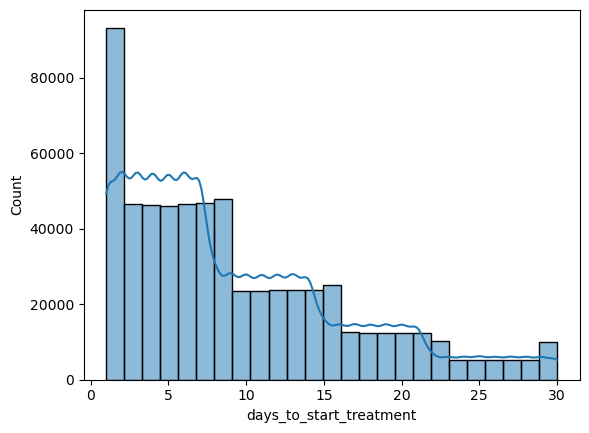

In [9]:
sns.histplot(df_survived['days_to_start_treatment'], bins=25, kde=True)

Based on the histograms, it would seem that there aren't any extreme values for either variable.

## 3. Exploratory Analysis - Scatterplot

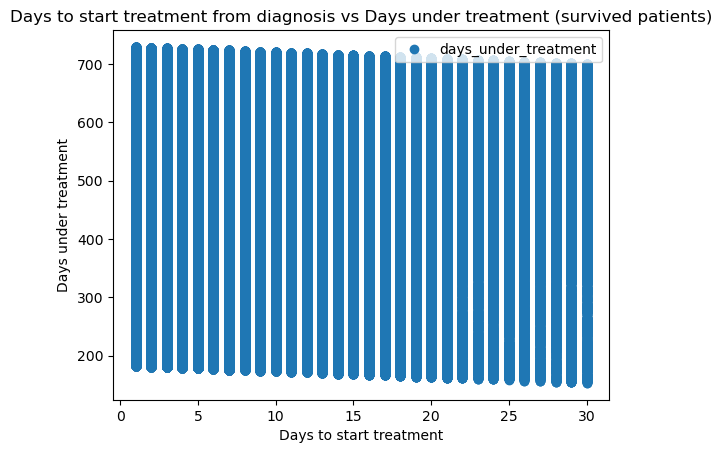

In [10]:
# Check 'days_to_start_treatment' and 'days_under_treatment'

df_survived.plot(x = 'days_to_start_treatment', y = 'days_under_treatment', style = 'o')
plt.title('Days to start treatment from diagnosis vs Days under treatment (survived patients)')
plt.xlabel('Days to start treatment')
plt.ylabel('Days under treatment')
plt.show()

In [11]:
# further subset df_survived to focus on patients who were diagnosed with different cancer stages
df_survived_1 = df_survived[df_survived['cancer_stage'] == 'Stage I']
df_survived_2 = df_survived[df_survived['cancer_stage'] == 'Stage II']
df_survived_3 = df_survived[df_survived['cancer_stage'] == 'Stage III']
df_survived_4 = df_survived[df_survived['cancer_stage'] == 'Stage IV']

In [12]:
df_survived_1['cancer_stage'].value_counts(dropna=False)

cancer_stage
Stage I    153496
Name: count, dtype: int64

In [13]:
df_survived_2['cancer_stage'].value_counts(dropna=False)

cancer_stage
Stage II    155329
Name: count, dtype: int64

In [14]:
df_survived_3['cancer_stage'].value_counts(dropna=False)

cancer_stage
Stage III    156603
Name: count, dtype: int64

In [15]:
df_survived_4['cancer_stage'].value_counts(dropna=False)

cancer_stage
Stage IV    159177
Name: count, dtype: int64

Text(0, 0.5, 'Days Under Treatment')

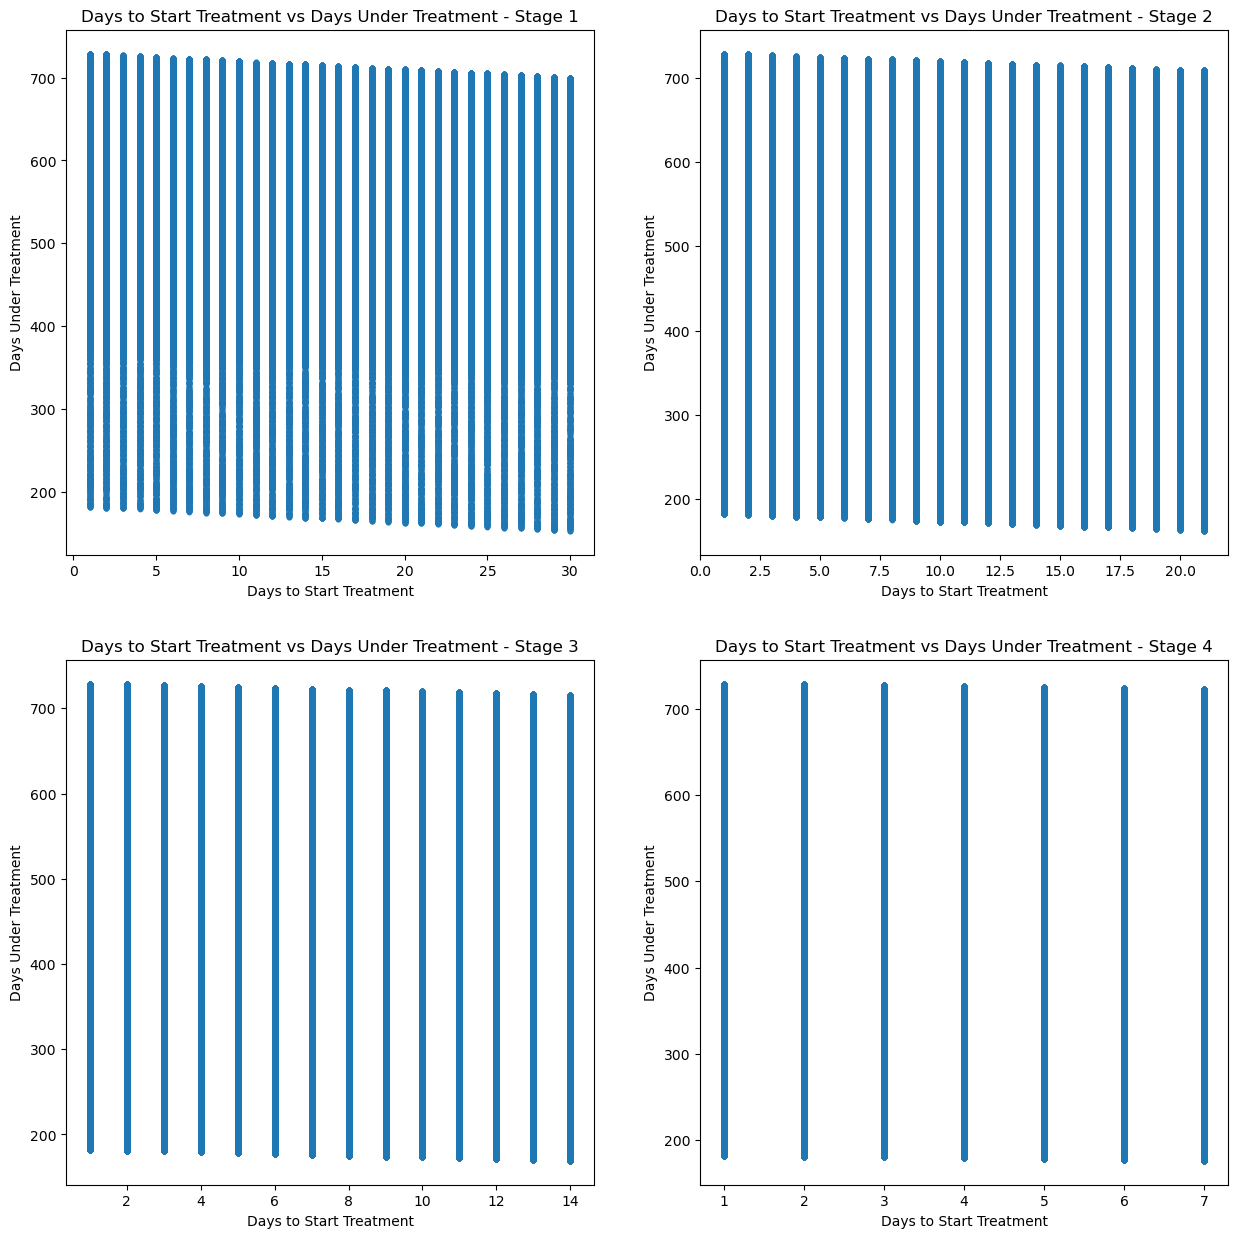

In [16]:
# Create scatterplot for one of the new subsets of survived patients

fig, axs = plt.subplots(2, 2, figsize=(15, 15))

axs[0, 0].scatter(df_survived_1['days_to_start_treatment'], df_survived_1['days_under_treatment'], s=10)
axs[0, 0].set_title('Days to Start Treatment vs Days Under Treatment - Stage 1')
axs[0, 0].set_xlabel('Days to Start Treatment')
axs[0, 0].set_ylabel('Days Under Treatment')

axs[0, 1].scatter(df_survived_2['days_to_start_treatment'], df_survived_2['days_under_treatment'], s=10)
axs[0, 1].set_title('Days to Start Treatment vs Days Under Treatment - Stage 2')
axs[0, 1].set_xlabel('Days to Start Treatment')
axs[0, 1].set_ylabel('Days Under Treatment')

axs[1, 0].scatter(df_survived_3['days_to_start_treatment'], df_survived_3['days_under_treatment'], s=10)
axs[1, 0].set_title('Days to Start Treatment vs Days Under Treatment - Stage 3')
axs[1, 0].set_xlabel('Days to Start Treatment')
axs[1, 0].set_ylabel('Days Under Treatment')

axs[1, 1].scatter(df_survived_4['days_to_start_treatment'], df_survived_4['days_under_treatment'], s=10)
axs[1, 1].set_title('Days to Start Treatment vs Days Under Treatment - Stage 4')
axs[1, 1].set_xlabel('Days to Start Treatment')
axs[1, 1].set_ylabel('Days Under Treatment')

## 4. Hypothesis

If I had to make a hypothesis based on the above scatterplot, it would be:

**"If the number of days it takes to start a patients treatment increases, then the number of days the patient is under treatment will decrease if they survive"**

- I am aware this doesn't make much sense in reality, but i notice a slight downward trend in the above scatterplot.

If the project data came from a real source, I would expect to make a hypothesis more along the lines of:

**If the number of days it takes to start a patients treatment increases, then the number of days the patient is under treatment will increase if they survive**

- This would be more in lines with real expectations since delaying treatment can allow the cancer to progress and be potentially harder to treat.

## 5. Reshape Variables into NumPy Arrays

In [17]:
# Arrays for Stage 1 patients
X1 = df_survived_1['days_to_start_treatment'].values.reshape(-1,1)
y1 = df_survived_1['days_under_treatment'].values.reshape(-1,1)

# Arrays for Stage 2 patients
X2 = df_survived_2['days_to_start_treatment'].values.reshape(-1,1)
y2 = df_survived_2['days_under_treatment'].values.reshape(-1,1)

# Arrays for Stage 3 patients
X3 = df_survived_3['days_to_start_treatment'].values.reshape(-1,1)
y3 = df_survived_3['days_under_treatment'].values.reshape(-1,1)

# Arrays for Stage 4 patients
X4 = df_survived_4['days_to_start_treatment'].values.reshape(-1,1)
y4 = df_survived_4['days_under_treatment'].values.reshape(-1,1)

In [18]:
# Perform some checks 
X1

array([[28],
       [ 4],
       [ 3],
       ...,
       [18],
       [19],
       [28]], dtype=int64)

In [19]:
X4

array([[1],
       [7],
       [1],
       ...,
       [7],
       [2],
       [1]], dtype=int64)

In [20]:
y1

array([[593],
       [382],
       [419],
       ...,
       [370],
       [380],
       [361]], dtype=int64)

In [21]:
y4

array([[461],
       [384],
       [301],
       ...,
       [269],
       [189],
       [409]], dtype=int64)

## 6. Split Data into Training and Test Sets

In [22]:
# For Stage 1
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

# 7. Running the Linear Regression

In [23]:
# Create a regression object
regression = LinearRegression()

In [24]:
# fit regression object onto training data for Stage 1
regression.fit(X1_train, y1_train)

LinearRegression()

In [25]:
# Predict values of days_under_treatment in the test data
y1_predicted = regression.predict(X1_test)

## 8. Visualising the Model

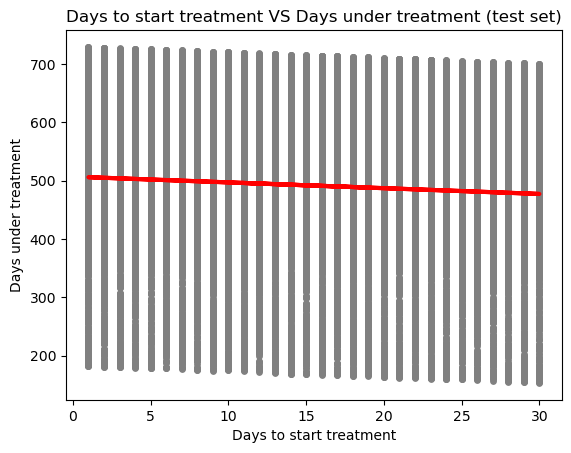

In [26]:
# Create a scatterplot of the test set with the regression line over it

plot_test = plt
plot_test.scatter(X1_test, y1_test, color='gray', s=15)
plot_test.plot(X1_test, y1_predicted, color='red', linewidth = 3)
plot_test.title("Days to start treatment VS Days under treatment (test set)")
plot_test.xlabel("Days to start treatment")
plot_test.ylabel("Days under treatment")
plot_test.show()

## 9. Interpretations

Obviously, the regression line does not fit the data very well (not that any line could). However, the regression lines trends downwards in much the same manner as the maximum and minimum values in 'days_under_treatment'. Assuming this is not just a flaw in the method of data generation (which it probably is), this may imply that hospitals have a set window of time they can work with a patient from diagnosis. Consequently, this would lower the the total number of days under treatment for patients who take longer to start the treatment after being diagnosed. However, the idea that a hospital would release patients with this in mind as opposed to seeing a treatment through to its conclusion is a bit ridiculous.

However, the extreme spread of data points would highlight there are many other factors contributing to the treatment duration (things like patient lifestyle, family history, various biological markers, hospital staff expertise, etc...).

## 10. Model Performance Checks

In [27]:
# Create objects that hold the model's summary statistics for cancer stage 1 patients

rmse_1 = mean_squared_error(y1_predicted, y1_test)
r2_1 = r2_score(y1_predicted, y1_test)

In [28]:
# Print results

print(f"Stage 1 Patients: RMSE = {rmse_1}, R2 = {r2_1}, Slope: {regression.coef_}")

Stage 1 Patients: RMSE = 16477.321780357794, R2 = -224.61799915729316, Slope: [[-0.98971335]]


## 12. Comparing Predicted and Actual Y Values

In [29]:
data = pd.DataFrame({'Actual' : y1_test.flatten(), 'Predicted' : y1_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,571,487.845491
1,709,501.701478
2,510,487.845491
3,302,491.804344
4,313,476.958644
5,583,479.927784
6,454,495.763197
7,622,481.907210
8,444,490.814631
9,655,487.845491


## 13. Reflection on Model's Performance and Bias

It was mostly expected that the model would not fit the data very well due to the issues inherent in the data's generation. This expectation was met for the following reasons:

- **Mean Squared Error:** There is a high amount of error in how well the regression line fits the test data
- **R2 Score:** This is actually negative meaning the model fits extremely poorly

Overall, I believe this is largely due to the fact that the data owner's clain that the data "closely reflects reality" is simply untrue for many of its aspects. But in reality, a weak relationship could still be observed due to a broad spectrum of variables from the patient's lifestyle, biological markers, and hospital staff expertise.

Bias is also difficult to judge. In a real version of this data, factors including the way patient survival is measured would have to be considered. For instance, some hospitals may release "survived" patients because they exhausted treatment and could not continue being treated but soon after passed away. These intricacies can greatly impact the data and any insights to be gleaned from it.

## Saving Subsets for Tableau

For Tableau, I should save the data in such a way that I will be able to compare different groups of patients (such as those of different genders, diagnosed at different cancer stages, and especially the survived and non-survived groups)

In [30]:
df.drop(columns=['age', 'bmi', 'cholesterol_level', 'Country GDP (per capita)', 'Country life expectancy', 'Country population'], inplace=True)

df

,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,days_to_start_treatment,days_under_treatment,treatment_duration
0,Female,Germany,2016-04-07,Stage III,2016-04-21,False,Never Smoked,True,True,False,False,Combined,2017-11-15,False,14,573,Long
1,Female,Germany,2016-12-15,Stage III,2016-12-22,False,Former Smoker,True,True,False,False,Combined,2018-06-14,False,7,539,Medium
2,Male,Germany,2016-07-14,Stage III,2016-07-27,True,Former Smoker,False,False,False,False,Combined,2017-09-03,False,13,403,Medium
3,Female,Germany,2016-03-19,Stage IV,2016-03-26,False,Current Smoker,True,True,False,False,Chemotherapy,2017-04-06,False,7,376,Medium
4,Male,Germany,2016-08-20,Stage II,2016-08-31,False,Former Smoker,True,False,False,False,Combined,2018-01-23,False,11,510,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2842399,Male,Denmark,2023-03-25,Stage IV,2023-03-28,False,Never Smoked,True,True,False,False,Combined,2023-12-18,False,3,265,Short
2842400,Female,Denmark,2023-05-19,Stage IV,2023-05-20,True,Never Smoked,True,False,False,True,Surgery,2024-04-09,False,1,325,Short
2842401,Female,Denmark,2023-03-27,Stage IV,2023-03-31,False,Passive Smoker,True,True,False,True,Radiation,2024-05-19,False,4,415,Medium
2842402,Male,Denmark,2023-04-11,Stage IV,2023-04-15,False,Never Smoked,True,False,True,False,Surgery,2023-10-11,False,4,179,Short


In [31]:
# Create a sample of the data so it can be saved and taken as a csv:

## Set Seed
np.random.seed(4)

## Create a list for dividing dataset into big and small sets
dev = np.random.rand(len(df)) <= 0.8

## Create small sample:
small_df = df[~dev]

## Create big sample
big_df = df[dev]

In [32]:
# Check 
print(f'observations in dataframe: {len(df)}')
print(f'observations in small sample: {len(small_df)}')
print(f'observations in big sample: {len(big_df)}')
print(f'observations in both samples: {len(small_df) + len(big_df)}')

observations in dataframe: 2842404
observations in small sample: 568971
observations in big sample: 2273433
observations in both samples: 2842404


In [33]:
small_df

,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,days_to_start_treatment,days_under_treatment,treatment_duration
0,Female,Germany,2016-04-07,Stage III,2016-04-21,False,Never Smoked,True,True,False,False,Combined,2017-11-15,False,14,573,Long
2,Male,Germany,2016-07-14,Stage III,2016-07-27,True,Former Smoker,False,False,False,False,Combined,2017-09-03,False,13,403,Medium
6,Female,Germany,2016-04-23,Stage II,2016-05-07,True,Current Smoker,True,True,True,False,Combined,2017-08-17,False,14,467,Medium
12,Female,Germany,2016-12-16,Stage I,2017-01-13,True,Passive Smoker,True,False,False,False,Surgery,2018-08-29,True,28,593,Long
13,Female,Germany,2016-03-30,Stage IV,2016-03-31,True,Current Smoker,True,True,False,False,Radiation,2017-07-18,False,1,474,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2842392,Male,Denmark,2023-03-28,Stage III,2023-04-02,False,Former Smoker,True,False,False,False,Surgery,2023-12-19,False,5,261,Short
2842395,Male,Denmark,2023-02-02,Stage II,2023-02-12,False,Passive Smoker,False,True,True,False,Chemotherapy,2024-05-23,False,10,466,Medium
2842397,Male,Denmark,2023-01-06,Stage IV,2023-01-11,True,Passive Smoker,True,True,True,False,Chemotherapy,2023-08-29,False,5,230,Short
2842399,Male,Denmark,2023-03-25,Stage IV,2023-03-28,False,Never Smoked,True,True,False,False,Combined,2023-12-18,False,3,265,Short


In [34]:
# Small_df will be saved for Tableau Exploration and StoryBoard
small_df.to_csv(os.path.join(path, "02 Data", "Prepared Data", "Linear_regression_sample.csv"))

Since the sample created a strange deviation in the trendline for survived patients, I am also going to just save the df_survived dataframe so I have the same (and more accurate) trend from the above analysis

In [35]:
df_survived.drop(columns=['age', 'bmi', 'cholesterol_level', 'Country GDP (per capita)', 'Country life expectancy', 'Country population'], inplace=True)

df_survived

C:\Users\kyles\AppData\Local\Temp\ipykernel_26464\1153090638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_survived.drop(columns=['age', 'bmi', 'cholesterol_level', 'Country GDP (per capita)', 'Country life expectancy', 'Country population'], inplace=True)


,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,days_to_start_treatment,days_under_treatment,treatment_duration
8,Male,Germany,2016-04-13,Stage II,2016-04-23,True,Former Smoker,True,True,False,False,Radiation,2017-09-24,True,10,519,Medium
12,Female,Germany,2016-12-16,Stage I,2017-01-13,True,Passive Smoker,True,False,False,False,Surgery,2018-08-29,True,28,593,Long
16,Male,Germany,2016-02-28,Stage III,2016-03-02,True,Passive Smoker,True,False,True,False,Surgery,2016-09-26,True,3,208,Short
17,Female,Germany,2016-05-09,Stage IV,2016-05-10,True,Current Smoker,False,False,False,False,Chemotherapy,2017-08-14,True,1,461,Medium
18,Male,Germany,2016-09-15,Stage III,2016-09-25,True,Passive Smoker,True,True,False,False,Radiation,2018-07-09,True,10,652,Long
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2842374,Female,Denmark,2023-02-25,Stage III,2023-03-05,False,Never Smoked,True,True,False,False,Surgery,2024-04-30,True,8,422,Medium
2842382,Female,Denmark,2023-07-03,Stage III,2023-07-05,False,Never Smoked,True,False,False,True,Combined,2024-01-22,True,2,201,Short
2842386,Female,Denmark,2023-01-17,Stage III,2023-01-27,True,Passive Smoker,True,False,False,False,Chemotherapy,2024-04-10,True,10,439,Medium
2842389,Female,Denmark,2023-01-13,Stage III,2023-01-17,False,Former Smoker,True,True,False,False,Combined,2024-03-02,True,4,410,Medium


In [ ]:
df_survived.to_csv(os.path.join(path, "02 Data", "Prepared Data", "Linear_regression_survived_only.csv"))